<a href="https://colab.research.google.com/github/onuroner/BrainTumorDetectionUsingCnn/blob/main/Brain_Tumor_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Kütüphanelerin Import Edilmesi

In [ ]:
import os
from PIL import Image

import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Veriseti Üzerinde İncelemeler

In [ ]:
data_dir = '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset'

In [ ]:
os.listdir(data_dir)

['yes', 'no']

In [ ]:
import matplotlib.image as mpimg

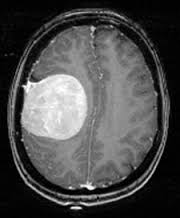

In [ ]:
image = Image.open('/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/yes/Y1.jpg')
image

In [ ]:
image.size

(180, 218)

In [ ]:
positives_dir = data_dir + '/yes'
negatives_dir = data_dir + '/no'

In [ ]:
pos_list = os.listdir(positives_dir)
neg_list = os.listdir(negatives_dir)

In [ ]:
pos_list

['Y59.JPG',
 'Y97.JPG',
 'Y183.jpg',
 'Y3.jpg',
 'Y116.JPG',
 'Y61.jpg',
 'Y156.JPG',
 'Y89.JPG',
 'Y24.jpg',
 'Y101.jpg',
 'Y6.jpg',
 'Y161.JPG',
 'Y157.JPG',
 'Y113.JPG',
 'Y2.jpg',
 'Y75.JPG',
 'Y258.JPG',
 'Y67.JPG',
 'Y159.JPG',
 'Y259.JPG',
 'Y58.JPG',
 'Y52.jpg',
 'Y249.JPG',
 'Y34.jpg',
 'Y14.jpg',
 'Y23.JPG',
 'Y114.JPG',
 'Y165.JPG',
 'Y92.png',
 'Y166.JPG',
 'Y181.jpg',
 'Y162.jpg',
 'Y70.jpg',
 'Y250.jpg',
 'Y246.JPG',
 'Y81.jpg',
 'Y164.JPG',
 'Y1.jpg',
 'Y12.jpg',
 'Y245.jpg',
 'Y73.jpg',
 'Y39.jpg',
 'Y107.jpg',
 'Y163.JPG',
 'Y8.jpg',
 'Y9.jpg',
 'Y38.jpg',
 'Y192.JPG',
 'Y44.JPG',
 'Y66.JPG',
 'Y108.jpg',
 'Y77.jpg',
 'Y85.JPG',
 'Y243.JPG',
 'Y40.JPG',
 'Y36.JPG',
 'Y49.JPG',
 'Y74.jpg',
 'Y91.jpg',
 'Y27.jpg',
 'Y95.jpg',
 'Y185.jpg',
 'Y16.JPG',
 'Y158.JPG',
 'Y29.jpg',
 'Y120.JPG',
 'Y194.jpg',
 'Y15.jpg',
 'Y60.jpg',
 'Y103.jpg',
 'Y170.JPG',
 'Y90.jpg',
 'Y42.jpg',
 'Y242.JPG',
 'Y46.jpg',
 'Y251.JPG',
 'Y98.JPG',
 'Y71.JPG',
 'Y244.JPG',
 'Y167.JPG',
 'Y99.JPG',

In [ ]:
print(f"Positive examples: {len(pos_list)}")
print(f"Negative examples: {len(neg_list)}")

Positive examples: 155
Negative examples: 98


### Resim Büyüklüklerinin İncelenmesi

In [ ]:
size_list =[]

for i in pos_list:
  image = Image.open(positives_dir + '/' + i)
  size_list.append(image.size[0])
  print(image.size)

(229, 270)
(272, 355)
(300, 347)
(456, 519)
(249, 269)
(433, 520)
(286, 370)
(241, 286)
(1024, 1024)
(300, 336)
(911, 938)
(273, 351)
(232, 309)
(254, 312)
(209, 212)
(264, 338)
(292, 349)
(215, 233)
(303, 354)
(278, 324)
(314, 340)
(911, 938)
(260, 331)
(310, 380)
(289, 300)
(272, 277)
(178, 249)
(223, 303)
(240, 300)
(253, 291)
(310, 380)
(1059, 1200)
(300, 325)
(213, 236)
(294, 355)
(216, 234)
(264, 336)
(180, 218)
(377, 500)
(213, 237)
(250, 290)
(236, 278)
(512, 512)
(270, 316)
(450, 446)
(630, 630)
(300, 325)
(273, 342)
(293, 337)
(288, 340)
(1059, 1200)
(300, 353)
(244, 308)
(272, 331)
(306, 365)
(204, 251)
(271, 307)
(620, 620)
(1061, 1280)
(630, 630)
(225, 225)
(318, 380)
(313, 360)
(283, 334)
(630, 630)
(224, 245)
(256, 256)
(310, 380)
(197, 255)
(825, 993)
(290, 355)
(512, 512)
(200, 210)
(279, 344)
(634, 929)
(278, 349)
(276, 323)
(300, 349)
(278, 351)
(272, 350)
(283, 357)
(205, 243)
(225, 225)
(300, 325)
(297, 348)
(319, 360)
(587, 630)
(504, 630)
(226, 223)
(628, 630)
(2

In [ ]:
size_list = np.array(size_list)
size_list.mean()

361.23870967741937

In [ ]:
div_list =[]

for i in pos_list:
  image = Image.open(positives_dir + '/' + i)
  div_list.append(image.size[0]/image.size[1])
  print(image.size[0]/image.size[1])

0.8481481481481481
0.7661971830985915
0.8645533141210374
0.8786127167630058
0.9256505576208178
0.8326923076923077
0.772972972972973
0.8426573426573427
1.0
0.8928571428571429
0.9712153518123667
0.7777777777777778
0.7508090614886731
0.8141025641025641
0.9858490566037735
0.7810650887573964
0.836676217765043
0.9227467811158798
0.8559322033898306
0.8580246913580247
0.9235294117647059
0.9712153518123667
0.7854984894259819
0.8157894736842105
0.9633333333333334
0.9819494584837545
0.714859437751004
0.735973597359736
0.8
0.8694158075601375
0.8157894736842105
0.8825
0.9230769230769231
0.902542372881356
0.828169014084507
0.9230769230769231
0.7857142857142857
0.8256880733944955
0.754
0.8987341772151899
0.8620689655172413
0.8489208633093526
1.0
0.8544303797468354
1.0089686098654709
1.0
0.9230769230769231
0.7982456140350878
0.8694362017804155
0.8470588235294118
0.8825
0.8498583569405099
0.7922077922077922
0.8217522658610272
0.8383561643835616
0.8127490039840638
0.8827361563517915
1.0
0.82890625
1.0
1

In [ ]:
div_list = np.array(div_list)

In [ ]:
div_list.mean()

0.868342768378169

In [ ]:
size_list =[]

for i in neg_list:
  image = Image.open(negatives_dir + '/' + i)
  size_list.append(image.size[0])
  print(image.size)

(173, 201)
(300, 168)
(630, 630)
(1024, 1024)
(194, 259)
(200, 252)
(276, 338)
(173, 201)
(225, 225)
(227, 222)
(150, 198)
(207, 243)
(630, 630)
(208, 242)
(200, 252)
(201, 250)
(441, 442)
(201, 251)
(356, 474)
(225, 225)
(200, 200)
(218, 231)
(259, 194)
(236, 213)
(380, 530)
(215, 234)
(225, 225)
(630, 630)
(201, 251)
(225, 225)
(276, 326)
(225, 225)
(201, 251)
(275, 183)
(225, 225)
(350, 393)
(225, 225)
(208, 242)
(225, 225)
(212, 238)
(218, 231)
(232, 217)
(177, 197)
(225, 225)
(232, 217)
(300, 168)
(235, 214)
(630, 614)
(225, 225)
(300, 168)
(230, 282)
(192, 192)
(228, 221)
(227, 262)
(208, 248)
(228, 221)
(225, 225)
(428, 417)
(225, 225)
(468, 444)
(550, 664)
(232, 217)
(512, 512)
(1920, 1080)
(630, 630)
(225, 225)
(359, 449)
(220, 275)
(201, 250)
(196, 257)
(339, 340)
(630, 630)
(504, 540)
(442, 442)
(680, 680)
(206, 244)
(472, 537)
(420, 280)
(442, 442)
(210, 264)
(220, 275)
(728, 725)
(750, 750)
(642, 361)
(442, 454)
(630, 630)
(409, 442)
(400, 442)
(393, 400)
(275, 301)
(225, 

In [ ]:
size_list = np.array(size_list)
size_list.mean()

343.16326530612247

In [ ]:
div_list =[]

for i in pos_list:
  image = Image.open(positives_dir + '/' + i)
  div_list.append(image.size[0]/image.size[1])
  print(image.size[0]/image.size[1])

0.8481481481481481
0.7661971830985915
0.8645533141210374
0.8786127167630058
0.9256505576208178
0.8326923076923077
0.772972972972973
0.8426573426573427
1.0
0.8928571428571429
0.9712153518123667
0.7777777777777778
0.7508090614886731
0.8141025641025641
0.9858490566037735
0.7810650887573964
0.836676217765043
0.9227467811158798
0.8559322033898306
0.8580246913580247
0.9235294117647059
0.9712153518123667
0.7854984894259819
0.8157894736842105
0.9633333333333334
0.9819494584837545
0.714859437751004
0.735973597359736
0.8
0.8694158075601375
0.8157894736842105
0.8825
0.9230769230769231
0.902542372881356
0.828169014084507
0.9230769230769231
0.7857142857142857
0.8256880733944955
0.754
0.8987341772151899
0.8620689655172413
0.8489208633093526
1.0
0.8544303797468354
1.0089686098654709
1.0
0.9230769230769231
0.7982456140350878
0.8694362017804155
0.8470588235294118
0.8825
0.8498583569405099
0.7922077922077922
0.8217522658610272
0.8383561643835616
0.8127490039840638
0.8827361563517915
1.0
0.82890625
1.0
1

In [ ]:
div_list = np.array(div_list)

In [ ]:
div_list.mean()

0.868342768378169

# Verisetinin Oluşturulması

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset')

In [ ]:
len(list(data_dir.glob('*/*')))

253

In [ ]:
positives = list(data_dir.glob('yes/*'))
positives = [str(img) for img in positives]
positives

['/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/yes/Y59.JPG',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/yes/Y97.JPG',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/yes/Y183.jpg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/yes/Y3.jpg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/yes/Y116.JPG',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/yes/Y61.jpg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/yes/Y156.JPG',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/yes/Y89.JPG',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/yes/Y24.jpg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/yes/Y101.jpg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/yes/Y6.jpg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/yes/Y161.JPG',
 '/content/drive/MyDrive/

In [ ]:
negatives = list(data_dir.glob('no/*'))
negatives = [str(img) for img in negatives]
negatives

['/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/10 no.jpg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/11 no.jpg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/1 no.jpeg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/N21.jpg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/20 no.jpg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/31 no.jpg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/N1.JPG',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/9 no.jpg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/3 no.jpg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/50 no.jpg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/34 no.jpg',
 '/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/22 no.jpg',
 '/content/drive/MyDriv

In [ ]:
pos_ds = []
neg_ds = []

for i in positives:
  pos_ds.append((i,1))

for i in negatives:
  neg_ds.append((i,0))

In [ ]:
neg_ds

[('/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/10 no.jpg',
  0),
 ('/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/11 no.jpg',
  0),
 ('/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/1 no.jpeg',
  0),
 ('/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/N21.jpg',
  0),
 ('/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/20 no.jpg',
  0),
 ('/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/31 no.jpg',
  0),
 ('/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/N1.JPG',
  0),
 ('/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/9 no.jpg',
  0),
 ('/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/3 no.jpg',
  0),
 ('/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/50 no.jpg',
  0),
 ('/content/drive/MyDrive/brain_tumor_detection/brain_tumor_dataset/no/34 no.jpg',
  0),
 ('/content/drive/MyDrive/br

In [ ]:
img = cv2.imread(positives[0])
img.shape

(270, 229, 3)

In [ ]:
cv2.resize(img, (300,300)).shape

(300, 300, 3)

In [ ]:
X = []
y = []

for i in pos_ds:
  img = cv2.imread(i[0])
  resized_img = cv2.resize(img, (180,180))
  X.append(resized_img)
  y.append(i[1])

for i in neg_ds:
  img = cv2.imread(i[0])
  resized_img = cv2.resize(img, (180,180))
  X.append(resized_img)
  y.append(i[1])

In [ ]:
X = np.array(X)
y = np.array(y)

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17, stratify=y)

In [ ]:
len(X_train)

189

In [ ]:
len(X_test)

64

### Standartization

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0].shape

(180, 180, 3)

# Model Oluşturulması

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPool2D
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(180, 180,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=3)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 20, 20, 64)      

In [ ]:
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=15,
    validation_data=(X_test, y_test) 
)

Epoch 1/15
6/6 [==============================] - 36s 7s/step - loss: 2.0457 - accuracy: 0.6349 - val_loss: 0.7689 - val_accuracy: 0.3906
Epoch 2/15
6/6 [==============================] - 6s 1s/step - loss: 0.7062 - accuracy: 0.5344 - val_loss: 0.6442 - val_accuracy: 0.7969
Epoch 3/15
6/6 [==============================] - 8s 1s/step - loss: 0.5912 - accuracy: 0.7831 - val_loss: 0.5600 - val_accuracy: 0.7344
Epoch 4/15
6/6 [==============================] - 6s 1s/step - loss: 0.4948 - accuracy: 0.7725 - val_loss: 0.5286 - val_accuracy: 0.7969
Epoch 5/15
6/6 [==============================] - 6s 1s/step - loss: 0.4672 - accuracy: 0.8042 - val_loss: 0.5232 - val_accuracy: 0.7969
Epoch 6/15
6/6 [==============================] - 6s 1s/step - loss: 0.4063 - accuracy: 0.8201 - val_loss: 0.4654 - val_accuracy: 0.7812
Epoch 7/15
6/6 [==============================] - 6s 1s/step - loss: 0.3504 - accuracy: 0.8519 - val_loss: 0.4631 - val_accuracy: 0.7812
Epoch 8/15
6/6 [========================